<a href="https://colab.research.google.com/github/shaggyweb3/Data_science/blob/main/CarPricePrediction_updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression - Car Price Prediction

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [3]:
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Load the Data

In [8]:
data = pd.read_csv("CarPrice_Assignment.csv")
data2 = data[["drivewheel","carbody","price"]]

2. Data Cleaning and Preprocessing

In [41]:
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [ ]:
data.isnull().sum()

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

Visualize the given dataser


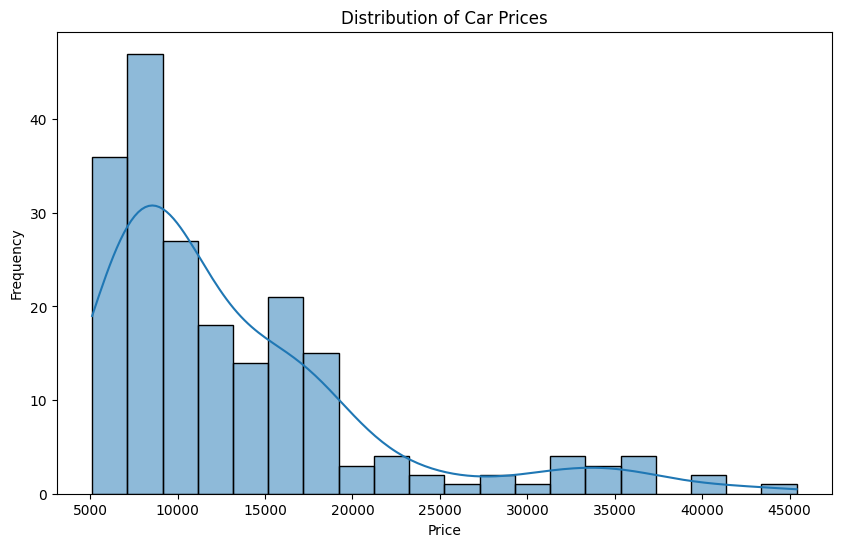

In [21]:
# Visualize the distribution of the target variable 'price'
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data['price'], bins=20, kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

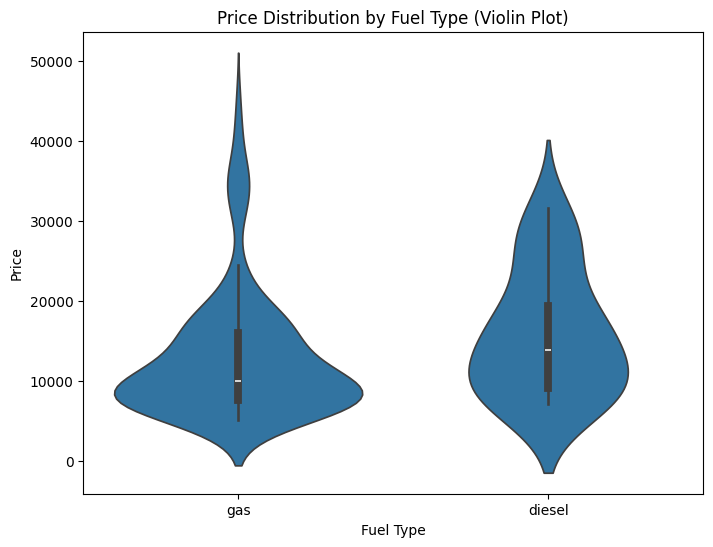

In [28]:
plt.figure(figsize=(8, 6))
sns.violinplot(x="fueltype", y="price", data=data)
plt.xlabel("Fuel Type")
plt.ylabel("Price")
plt.title("Price Distribution by Fuel Type (Violin Plot)")
plt.show()

In [13]:
# In summary, this visualization helps us understand the distribution of car prices, with a peak around 5000 to 10000 and a gradual decline as prices increase.

# Step 2: Split the Data into Target - Features

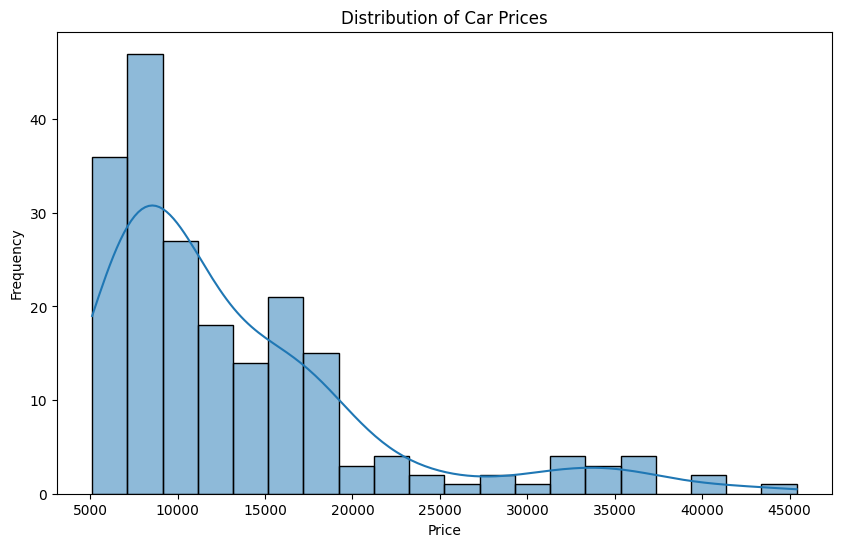

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(data2['price'], bins=20, kde=True)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

In [16]:
data2['drivewheel'].value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

In [ ]:
# FWD hass more number of customeres in the market , so if company want to capture market should focus on the FWD cars

In [29]:
data2['drivewheel'] = data2['drivewheel'].map({'fwd': 0, 'rwd': 1, '4wd': 1})

<ipython-input-29-7e9315f7ad99>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['drivewheel'] = data2['drivewheel'].map({'fwd': 0, 'rwd': 1, '4wd': 1})


In [30]:
# Assuming 'data2' is your DataFrame
data2.loc[data2['drivewheel'] == 'fwd', 'drivewheel'] = 0
data2.loc[data2['drivewheel'].isin(['rwd', '4wd']), 'drivewheel'] = 1


In [32]:
data2['carbody'].value_counts()

# Sedan and hatcback has more number of customeres in the market , so if company want to capture market should focus on the sedana and hatchback cars

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

In [33]:
data2['carbody'] = data2['carbody'].map({'sedan': 0, 'hatchback': 1, 'wagon': 2, 'hardtop': 3, 'convertible': 4})


<ipython-input-33-ce5b1cb7fb3a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['carbody'] = data2['carbody'].map({'sedan': 0, 'hatchback': 1, 'wagon': 2, 'hardtop': 3, 'convertible': 4})


In [34]:
data2.head()

,drivewheel,carbody,price
0,1,4,13495.0
1,1,4,16500.0
2,1,1,16500.0
3,0,0,13950.0
4,1,0,17450.0


In [35]:
y = data2['price']
x = data2.drop("price",axis=1)

In [36]:
x.head()

,drivewheel,carbody
0,1,4
1,1,4
2,1,1
3,0,0
4,1,0


In [37]:
y.head()

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64

# Step 3: Data Preprocessing

In [ ]:
x.isnull().sum()



drivewheel    0
carbody       0
dtype: int64

In [ ]:
y.isnull().sum()

0

EDA

<ipython-input-40-6664c28b1c6b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


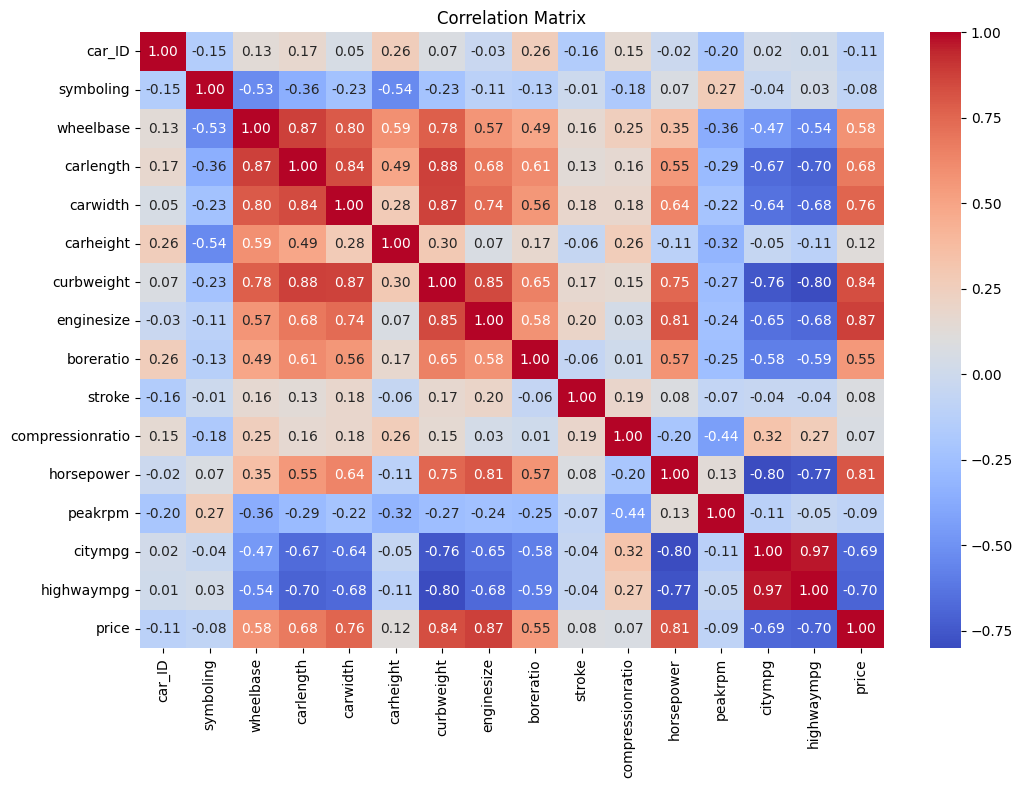

<Figure size 1500x1000 with 0 Axes>

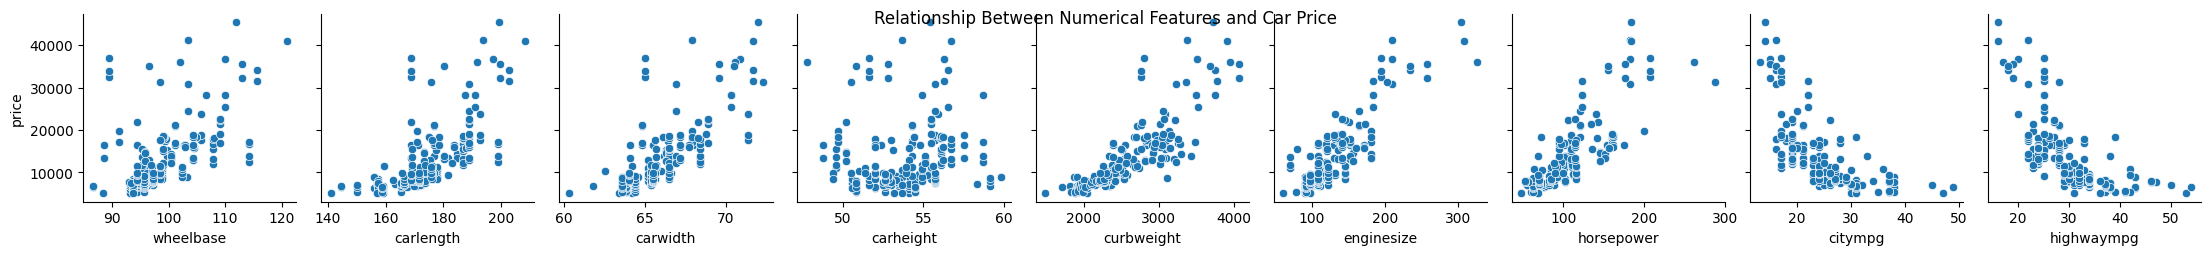

In [40]:
# Correlation analysis
correlation_matrix = data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

# Visualize the relationship between numerical features and the target variable 'price'
plt.figure(figsize=(15, 10))
sns.pairplot(data, x_vars=['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize',
                         'horsepower', 'citympg', 'highwaympg'], y_vars=['price'], kind='scatter')
plt.suptitle('Relationship Between Numerical Features and Car Price')
plt.show()

In [ ]:
#Key observations:
#‘enginesize’ has a high positive correlation with ‘price’ (0.87), suggesting that larger engines tend to lead to higher prices.
#‘highwaympg’ has a significant negative correlation with ‘price’ (-0.70), indicating that cars with better highway fuel efficiency are priced lower.

# Step 4: Train - Test Split

In [63]:
# Perform one-hot encoding for categorical variables
data_encoded = pd.get_dummies(data, columns=['carbody', 'drivewheel', 'fueltype'], drop_first=True)


In [66]:
# Selecting independent variables
X = data_encoded[[ 'carbody_hatchback', 'carbody_sedan', 'drivewheel_fwd','fueltype_gas']]


In [76]:
from sklearn.model_selection import train_test_split

# Target variable
y = data['price']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
X_train

In [ ]:
y_train

# Step 5 : Fit thte LinearRegression Model

In [77]:
# Initialize the linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

LinearRegression()

# Step 6: Make predictions

In [78]:
# Make predictions on the testing set
y_pred = model.predict(X_test)

# Step 7 : Evaluation

In [79]:
# Calculate R-squared score
r_squared = r2_score(y_test, y_pred)
print("R-squared score:", r_squared)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

R-squared score: 0.3931250239926598
Mean Squared Error: 47909150.77726521


# Visualize

In [ ]:
# Calculate the Accuracy



Accuracy: 0.0
Precision: nan


C:\Users\VVP\AppData\Local\Temp\ipykernel_14064\601214724.py:16: RuntimeWarning: invalid value encountered in scalar divide
  precision = true_positives / (true_positives + false_positives)


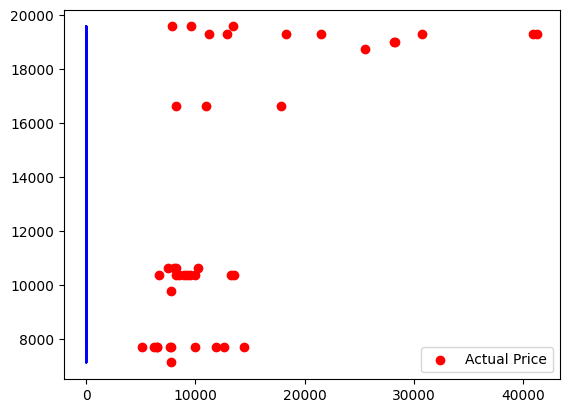

In [80]:
plt.scatter(y_test, y_pred, color="red", label = "Actual Price")
plt.plot(X_test, y_pred, color="blue")
plt.legend()
plt.show()

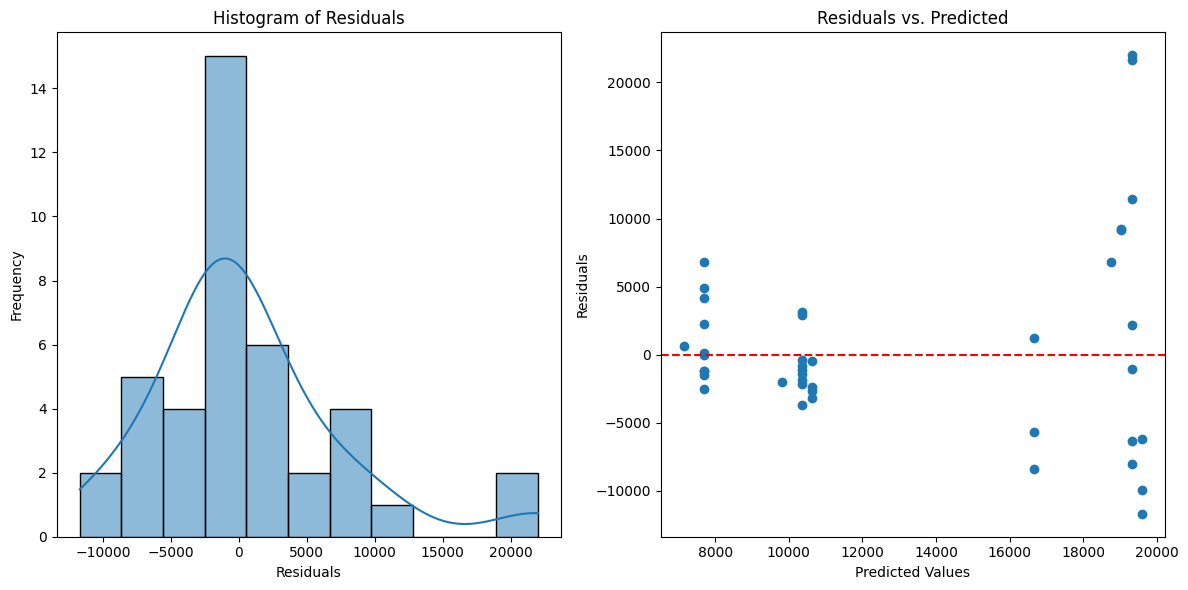

In [81]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate residuals
residuals = y_test - y_pred

# Residual Analysis
plt.figure(figsize=(12, 6))

# Histogram of residuals
plt.subplot(1, 2, 1)
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

# Scatter plot of predicted vs. residuals
plt.subplot(1, 2, 2)
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs. Predicted')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

plt.tight_layout()
plt.show()


In [84]:
# By using this analysis we can say that some values has some significant realtion with the car prices and those are
#1. Fueltype / cartype / wheeldrive
#2. If company focuses on cars which has gas as a fueltype and sedan or hatchback as a cartype and 4wd as a wheell drive Company could make good bussiness in this nerw market